In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'Desktop//train_5500.csv'
train = pd.read_csv(file_path)
train.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [12]:
#information of the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [4]:
#description of the training dataset
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [5]:
# count missing values
num_missing_values_columns = train.isnull().any().sum()
print(f'There are {num_missing_values_columns} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [6]:
#identifies and counts the number of missing values in each column
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

n11                   69752
employmentLength      46799
n8                    40271
n14                   40270
n13                   40270
n12                   40270
n9                    40270
n0                    40270
n1                    40270
n2                    40270
n3                    40270
n5                    40270
n6                    40270
n7                    40270
n10                   33239
n4                    33239
revolUtil               531
pubRecBankruptcies      405
dti                     239
title                     1
postCode                  1
employmentTitle           1
dtype: int64

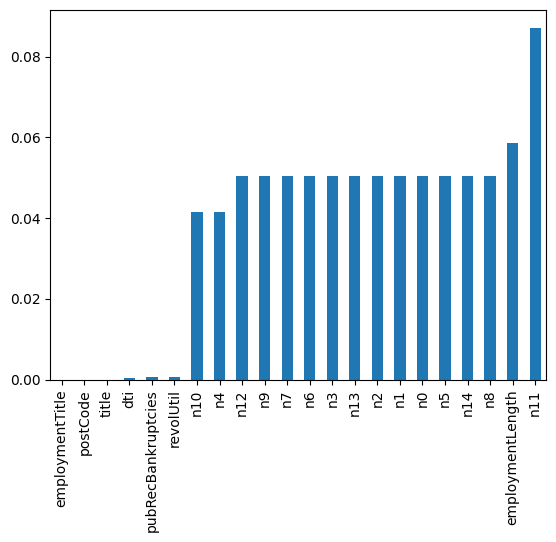

In [5]:
#plot the missing values
missing_proportion = train.isnull().sum() / len(train)
missing_proportion = missing_proportion[missing_proportion > 0]
missing_proportion.sort_values(inplace=True)
missing_proportion.plot.bar()
plt.show()

In [7]:
# Identify the features that have one unique value
# find 'policyCode' is the unique value
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1]
print(f'There is {len(one_value_fea)} columns {one_value_fea} in dataset with one unique value')

There is 1 columns ['policyCode'] in dataset with one unique value


In [12]:
# Check duplicates
columns_to_check = train.columns.difference(['policyCode'])
duplicates = train.duplicated(subset=columns_to_check, keep=False)

number_of_duplicates = duplicates.sum()
print(f'There are {number_of_duplicates} duplicate rows when considering \'policyCode\' being different.')

if number_of_duplicates > 0:
    print(train.loc[duplicates])
else:
    pass

There are 0 duplicate rows when considering 'policyCode' being different.


In [13]:
# Classify features by data type
numerical_feature = list(train.select_dtypes(exclude=['object']).columns)
non_numerical_feature = list(filter(lambda x: x not in numerical_feature, list(train.columns)))

def get_numerical_serial_fea(data, feas):
    numerical_serial_feature = []
    numerical_noserial_feature = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_feature.append(fea)
        else:
            numerical_serial_feature.append(fea)
    return numerical_serial_feature, numerical_noserial_feature

numerical_serial_feature, numerical_noserial_feature = get_numerical_serial_fea(train, numerical_feature)

# Print the value counts for discrete numerical features
for fea in numerical_noserial_feature:
    print(f'Feature: {fea} - Value Counts Analysis')
    print(pd.DataFrame(train[fea].value_counts().sort_index()).transpose().to_string())
    print('-' * 50)

Feature: term - Value Counts Analysis
term        3       5
count  606902  193098
--------------------------------------------------
Feature: homeOwnership - Value Counts Analysis
homeOwnership       0       1      2    3   4   5
count          395732  317660  86309  185  33  81
--------------------------------------------------
Feature: verificationStatus - Value Counts Analysis
verificationStatus       0       1       2
count               241222  309810  248968
--------------------------------------------------
Feature: isDefault - Value Counts Analysis
isDefault       0       1
count      640390  159610
--------------------------------------------------
Feature: initialListStatus - Value Counts Analysis
initialListStatus       0       1
count              466438  333562
--------------------------------------------------
Feature: applicationType - Value Counts Analysis
applicationType       0      1
count            784586  15414
--------------------------------------------------
Fe

/var/folders/1g/21yqgs5s233gn_w957thk6hw0000gn/T/ipykernel_65181/3106207884.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['interestRate'], shade=True)


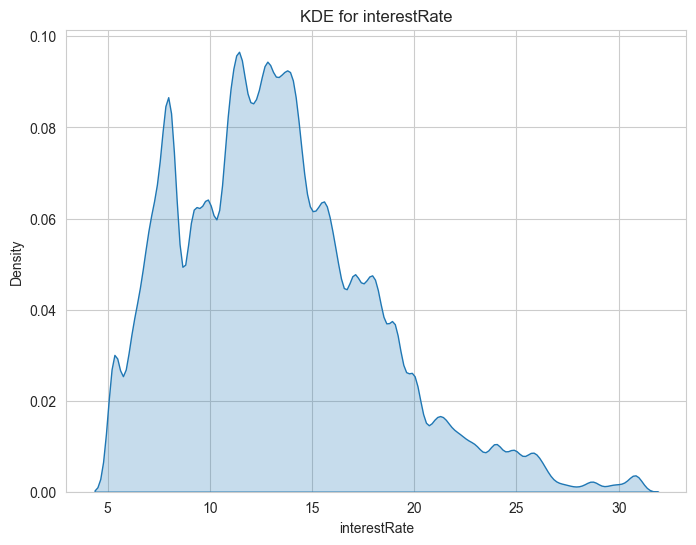

/var/folders/1g/21yqgs5s233gn_w957thk6hw0000gn/T/ipykernel_65181/3106207884.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['installment'], shade=True)


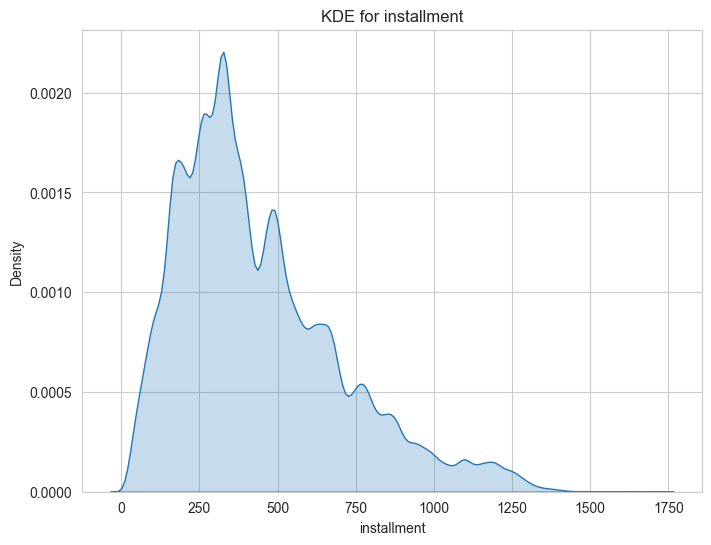

/var/folders/1g/21yqgs5s233gn_w957thk6hw0000gn/T/ipykernel_65181/3106207884.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['loanAmnt'], shade=True)


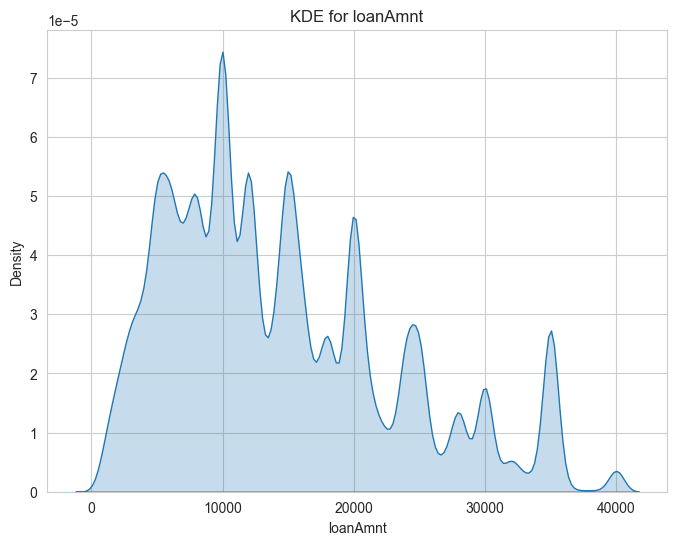

In [48]:
#Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(train['interestRate'], shade=True)
plt.title('KDE for interestRate')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(train['installment'], shade=True)
plt.title('KDE for installment')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(train['loanAmnt'], shade=True)
plt.title('KDE for loanAmnt')
plt.show()